In [1]:
#Just run this cell!
#Importing packages
import matplotlib
matplotlib.use('Agg')
from datascience import *
import pandas as pd
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Greenhouse Gas Emissions Over Time

Building off of the previous notebooks we've been working with, today we'll be using greenhouse gas emissions data from different sectors and countries using satellite data, AI and other measurements from [Climate TRACE](https://climatetrace.org/about).

In [2]:
#just run this cell!
ghg_emissions = requests.get("https://api.climatetrace.org/emissions_by_subsector_timeseries?interval=year&since=2010&to=2020").json()
ghg_emissions = pd.json_normalize(ghg_emissions)
ghg_emissions = Table.from_df(ghg_emissions)
ghg_emissions

country_full,country,sector,subsector,start,end,emissions
Aruba,ABW,agriculture,cropland fires,2020-01-01,2021-01-01,nan
Aruba,ABW,agriculture,cropland fires,2019-01-01,2020-01-01,nan
Aruba,ABW,agriculture,cropland fires,2018-01-01,2019-01-01,nan
Aruba,ABW,agriculture,cropland fires,2017-01-01,2018-01-01,nan
Aruba,ABW,agriculture,cropland fires,2016-01-01,2017-01-01,nan
Aruba,ABW,agriculture,cropland fires,2015-01-01,2016-01-01,nan
Aruba,ABW,agriculture,cropland fires,2014-01-01,2015-01-01,nan
Aruba,ABW,agriculture,cropland fires,2013-01-01,2014-01-01,nan
Aruba,ABW,agriculture,cropland fires,2012-01-01,2013-01-01,nan
Aruba,ABW,agriculture,cropland fires,2011-01-01,2012-01-01,nan


# Data Cleaning

### Missing values
As you may have noticed, there are `nan` values in the emissions column. Given the first few rows we are able to see on the table, this indicates that the dataset does not have greenhouse gas emissions data for country **Aruba**. Fill in the following code to drop all the rows that contain `nan` values in the `emissions` column

Hint: The function `np.isfinite` tests whether an element is not infinity or a `nan` value

In [3]:
#ghg_emissions = ghg_emissions.where(..., np.isfinite)
ghg_emissions = ghg_emissions.where("emissions", np.isfinite)
ghg_emissions

country_full,country,sector,subsector,start,end,emissions
Aruba,ABW,agriculture,rice cultivation,2020-01-01,2021-01-01,0
Aruba,ABW,agriculture,rice cultivation,2019-01-01,2020-01-01,0
Aruba,ABW,agriculture,rice cultivation,2018-01-01,2019-01-01,0
Aruba,ABW,agriculture,rice cultivation,2017-01-01,2018-01-01,0
Aruba,ABW,agriculture,rice cultivation,2016-01-01,2017-01-01,0
Aruba,ABW,agriculture,rice cultivation,2015-01-01,2016-01-01,0
Aruba,ABW,buildings,cooking,2020-01-01,2021-01-01,13300
Aruba,ABW,buildings,cooking,2019-01-01,2020-01-01,13300
Aruba,ABW,buildings,cooking,2018-01-01,2019-01-01,13300
Aruba,ABW,buildings,cooking,2017-01-01,2018-01-01,13700


### Table Manipulation
Next, we will be adding a column in the dataset that states strictly the year that the emissions data covers. There are two columns in the dataset we can pull the year from. Since the emissions data reflects the greenhouse emissions data for the entire year, we will be using the `end` column.

Hint: The dates on the end column are all **string** types and the year is a **substring** (a sequence of characters within another string)

In [4]:
#create Year column uaing the end columns
#dates = ghg_emissions.column("...")
#years = [int(date[...]) for date in dates]
#ghg_emissions = ghg_emissions.with_column("year", years)
#ghg_emissions

dates = ghg_emissions.column("end")
years = [int(date[:4]) for date in dates]
ghg_emissions = ghg_emissions.with_column("year", years)
ghg_emissions

country_full,country,sector,subsector,start,end,emissions,year
Aruba,ABW,agriculture,rice cultivation,2020-01-01,2021-01-01,0,2021
Aruba,ABW,agriculture,rice cultivation,2019-01-01,2020-01-01,0,2020
Aruba,ABW,agriculture,rice cultivation,2018-01-01,2019-01-01,0,2019
Aruba,ABW,agriculture,rice cultivation,2017-01-01,2018-01-01,0,2018
Aruba,ABW,agriculture,rice cultivation,2016-01-01,2017-01-01,0,2017
Aruba,ABW,agriculture,rice cultivation,2015-01-01,2016-01-01,0,2016
Aruba,ABW,buildings,cooking,2020-01-01,2021-01-01,13300,2021
Aruba,ABW,buildings,cooking,2019-01-01,2020-01-01,13300,2020
Aruba,ABW,buildings,cooking,2018-01-01,2019-01-01,13300,2019
Aruba,ABW,buildings,cooking,2017-01-01,2018-01-01,13700,2018


# Greenhouse Gas Sector Analysis

For the following section, we will be observing how greenhouse gas emissions have changed over time across all sectors in the dataset.  

Now that we have a cleaned dataset, let's reduce the amount of data we'll have to keep track of and choose the columns that we will be working with in this section. **Select the `Year`, `sector`, and `emissions` columns from the ghg_emissions dataset**

In [5]:
#sectors = ghg_emissions.select(['...', '...', '...'])
#sectors
sectors = ghg_emissions.select(['year', 'sector', 'emissions'])
sectors

year,sector,emissions
2021,agriculture,0
2020,agriculture,0
2019,agriculture,0
2018,agriculture,0
2017,agriculture,0
2016,agriculture,0
2021,buildings,13300
2020,buildings,13300
2019,buildings,13300
2018,buildings,13700


Going into the The following cell tells us what years this dataset covers.

In [10]:
year = np.unique(ghg_emissions.column("year"))
year

array([2016, 2017, 2018, 2019, 2020, 2021])

And the next cell we'll see what sectors we will be covering today.

In [11]:
sector_types = np.unique(ghg_emissions.column("sector"))
sector_types

array(['agriculture', 'buildings', 'extraction', 'manufacturing',
       'maritime', 'oil and gas', 'power', 'transport', 'waste'],
      dtype='<U13')

Now we want to aggregate the data to find the total amount of greenhouse gas emissions in each sector over time. **Create a table with the total amount of emissions per sector for each year.**

Hint: We want to group on column(s) and add all the emissions together within each group. For more information on how to use the `group` function, please refer to [Chapter 7.1.3](https://inferentialthinking.com/chapters/07/1/Visualizing_Categorical_Distributions.html?highlight=group) in the Data 8 textbook

In [13]:
#agg_sectors = sectors.group(..., ...)
#agg_sectors
agg_sectors = sectors.group(["sector", "year"], sum)
agg_sectors

sector,year,emissions sum
agriculture,2016,6.31602e+09
agriculture,2017,6.35032e+09
agriculture,2018,6.40422e+09
agriculture,2019,6.35244e+09
agriculture,2020,6.43106e+09
agriculture,2021,6.41922e+09
buildings,2016,4.03479e+09
buildings,2017,4.04836e+09
buildings,2018,4.12174e+09
buildings,2019,4.22608e+09


The advantage of pivot is that it places grouped values into adjacent columns, so that they can be combined and compared

Check out [Chapter 8.3.3](https://inferentialthinking.com/chapters/08/3/Cross-Classifying_by_More_than_One_Variable.html?highlight=pivot) in the Data 8 textbook and the [documentation](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html) to learn more about how to use the `pivot` function.

In [14]:
#agg_sectors = agg_sectors.pivot(..., ..., values = ...,collect=...)
#agg_sectors

agg_sectors = agg_sectors.pivot('sector', 'year', values = "emissions sum",collect=sum)
agg_sectors

year,agriculture,buildings,extraction,manufacturing,maritime,oil and gas,power,transport,waste
2016,6.31602e+09,4.03479e+09,5.15458e+07,9.36938e+09,8.10407e+08,5.54893e+09,1.34716e+10,7.1108e+09,3.16803e+09
2017,6.35032e+09,4.04836e+09,5.3314e+07,9.31098e+09,8.38055e+08,5.3857e+09,1.34767e+10,7.19147e+09,3.20247e+09
2018,6.40422e+09,4.12174e+09,5.32611e+07,9.3634e+09,8.7054e+08,5.51878e+09,1.36884e+10,7.27686e+09,3.25983e+09
2019,6.35244e+09,4.22608e+09,5.44093e+07,9.59278e+09,8.63974e+08,5.64849e+09,1.40029e+10,7.31804e+09,3.29614e+09
2020,6.43106e+09,4.22608e+09,5.50224e+07,9.70853e+09,9.53488e+08,5.69497e+09,1.39919e+10,7.33859e+09,3.29614e+09
2021,6.41922e+09,4.22608e+09,5.45942e+07,9.69734e+09,1.04236e+09,5.46634e+09,1.35643e+10,6.84983e+09,3.29614e+09


Check out [Chapter 7](https://inferentialthinking.com/chapters/07/3/Overlaid_Graphs.html) for more info on visualizations.

**Create a line plot showing how 

Text(0.5, 1.05, 'Emissions per Sector over Time')

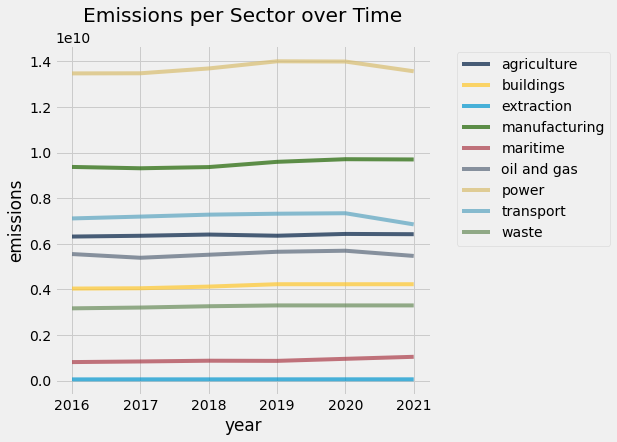

In [29]:
#agg_sectors.plot(...)

agg_sectors.plot("year")
plt.ylabel("emissions")
plt.title("Emissions per Sector over Time", y=1.05)

**What sectors are the top three most significant ghg emissions output? Why do you think this is the case?**


*Your answer here*

# Greenhouse Gas Subsector Analysis

In [30]:
#agg_subsectors = ghg_emissions.select([....])
#agg_subsectors

agg_subsectors = ghg_emissions.select(['sector', 'subsector', 'year', 'emissions'])
agg_subsectors

sector,subsector,year,emissions
agriculture,rice cultivation,2021,0
agriculture,rice cultivation,2020,0
agriculture,rice cultivation,2019,0
agriculture,rice cultivation,2018,0
agriculture,rice cultivation,2017,0
agriculture,rice cultivation,2016,0
buildings,cooking,2021,13300
buildings,cooking,2020,13300
buildings,cooking,2019,13300
buildings,cooking,2018,13700


**Create a table that contains emissions data ONLY for the sector with the largest emissions.**

In [35]:
#...

power = agg_subsectors.where("sector", 'power')
power

sector,subsector,year,emissions
power,electricity generation,2021,699000
power,electricity generation,2020,688000
power,electricity generation,2019,680000
power,electricity generation,2018,663000
power,electricity generation,2017,648000
power,electricity generation,2016,631000
power,other energy use,2021,0
power,other energy use,2020,0
power,other energy use,2019,0
power,other energy use,2018,0


**Use the `group` and `pivot` functions to create a table with representing the year and the subsectors that make up the sector with the largest emissions.**

In [36]:
#...

power = power.group(["sector", "subsector", "year"], sum)
power = power.pivot('subsector', 'year', values = "emissions sum",collect=sum)
power

/Users/hansocampo/opt/anaconda3/lib/python3.8/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


year,electricity generation,other energy use
2016,1.22531e+10,1.21853e+09
2017,1.21398e+10,1.3369e+09
2018,1.23017e+10,1.38678e+09
2019,1.2635e+10,1.36794e+09
2020,1.2624e+10,1.36794e+09
2021,1.21963e+10,1.36794e+09


**Now fill out the cell below to create a line plot visualizing emissions over time for each subsector in the sector with the most emissions.**

Text(0.5, 1.05, 'Emissions per Power Subsector over Time')

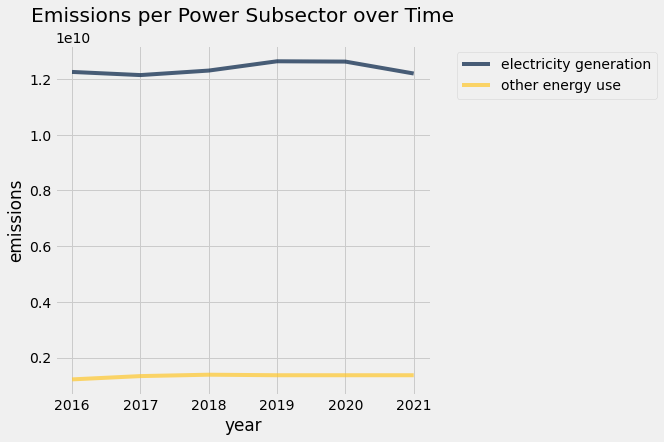

In [39]:
#...
#plt.ylabel("emissions")
#plt.title("...", y=1.05)

power.plot("year")
plt.ylabel("emissions")
plt.title("Emissions per Power Subsector over Time", y=1.05)

In [40]:
#Run this cell!! 

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def select_sector(sector):
    sector = agg_subsectors.where("sector", sector)
    sector = sector.group(["sector", "subsector", "year"], sum)
    sector = sector.pivot('subsector', 'year', values = "emissions sum",collect=sum)
    sector.plot('year')
    plt.ylabel("emissions")
    plt.title("Emissions per Subsector over Time", y=1.05)
    
    
sector_dropdown = widgets.Dropdown(options=sector_types,
                         value="power")
interact(select_sector, sector = sector_dropdown )

/Users/hansocampo/opt/anaconda3/lib/python3.8/site-packages/traitlets/traitlets.py:586: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


interactive(children=(Dropdown(description='sector', index=6, options=('agriculture', 'buildings', 'extraction…

<function __main__.select_sector(sector)>